## ESTADISTICA III

Vamos ahora a tomar de nuevo el conjunto de datos con el que estuvimos trabajando en los últimos días y vamos a continuar con el análisis de las estadísitcas de los contenidos del conjunto de datos.
Para todas los ejercicios de pair programming de Estadística I, II y III usaremos el dataframe que se tome para el desarrollo de este ejercicio de pair programming.
Se ruega a la hora de realizar la entrega que incluyais el conjunto de datos que hayais decidido emplear para estos ejercicios.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
import scipy.stats as st

In [2]:
df=pd.read_csv('instagram_global_top_1000.csv')
df.head(3)

,rank,account,title,link,category,followers,audience_country,authentic_engagement,engagement_avg,scraped
0,1,cristiano,Cristiano Ronaldo,https://www.instagram.com/cristiano/,Sports with a ball,400100000.0,India,7800000.0,9500000.0,2022-02-07 16:50:24.798803
1,2,kyliejenner,Kylie 🤍,https://www.instagram.com/kyliejenner/,Fashion|Modeling|Beauty,308800000.0,United States,6200000.0,10100000.0,2022-02-07 16:50:24.798803
2,3,leomessi,Leo Messi,https://www.instagram.com/leomessi/,Sports with a ball|Family,306300000.0,Argentina,4800000.0,6500000.0,2022-02-07 16:50:24.798803


Los objetivos de hoy son:
Extraer los siguentes estadísiticos del conjunto de datos para varias de las varibles disponibles.

In [3]:
def cambiar_followers(col): #Vamos a segmentar los datos de la columna followers
    if col<=24500000.0:
        return 'baja'
    elif col >24500000.0 and col<=351050000.0:
        return 'medio'
    else:
        return 'alto'

In [4]:
df['seguidores']=df['followers'].apply(cambiar_followers)# Creamos la nueva columna

1) Tabla de contingencia

In [6]:
#Creamos una tabla de contingencia entre las categorias de seguidores y los tipos de cuentas
df_contingencia= pd.crosstab(df['seguidores'], df['category'], margins=True) 
df_contingencia

category,Accessories|Jewellery|Clothing|Outfits|Fashion,Adult content,Animals,Art|Artists,Art|Artists|Beauty,Art|Artists|Cinema|Actors/actresses,Art|Artists|Cinema|Actors/actresses|Shows,Art|Artists|Comics sketches,Art|Artists|Fashion|Modeling,Art|Artists|Fashion|Music,...,Shows|Lifestyle,Shows|Modeling,Shows|Music,Sports with a ball,Sports with a ball|Family,Sports with a ball|Lifestyle,Sports with a ball|Lifestyle|Kids|Toys,Sports with a ball|Literature|Journalism,Sports with a ball|Shows,All
seguidores,,,,,,,,,,,,,,,,,,,,,
alto,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2
baja,0,7,1,2,1,2,1,1,2,1,...,2,1,1,67,0,3,1,1,0,655
medio,1,0,0,1,0,0,0,0,0,0,...,1,1,0,35,2,1,0,0,1,252
All,1,7,1,3,1,2,1,1,2,1,...,3,2,1,103,2,4,1,1,1,909


`Como tenemos muchas categorizaciones en la columna 'category' hemos analizado solo algunas`

In [7]:
df_contingencia['Sports with a ball']

seguidores
alto       1
baja      67
medio     35
All      103
Name: Sports with a ball, dtype: int64

`Seleccionamos la categoria 'Sports with a ball' para analizar, de la misma concluimos que tenemos 1 cuenta con numero de seguidores categorizada como 'alta', 67 cuentas en 'baja' y 35 en 'media'.`

In [16]:
df_contingencia['Adult content']

seguidores
alto     0
baja     7
medio    0
All      7
Name: Adult content, dtype: int64


`La categoria de 'Adult content' solo tiene asociadas 7 cuentas categorizadas como 'baja'.`

In [17]:
df_contingencia['Beauty']

seguidores
alto      0
baja     11
medio     5
All      16
Name: Beauty, dtype: int64

`La categoria 'Beauty' tiene asociadas 5 cuentas en 'media' y 11 en 'baja'.`

2) Coeficiente de correlación de las variables numéricas del dataset.

In [8]:
matriz_correlacion = df.corr()
matriz_correlacion

/var/folders/db/hp0l5_js4yv8br5y2tc3frpm0000gn/T/ipykernel_56284/2926037190.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = df.corr()


,rank,followers,authentic_engagement,engagement_avg
rank,1.000000,-0.435286,-0.463701,-0.506682
followers,-0.435286,1.000000,0.287067,0.336169
authentic_engagement,-0.463701,0.287067,1.000000,0.981982
engagement_avg,-0.506682,0.336169,0.981982,1.000000


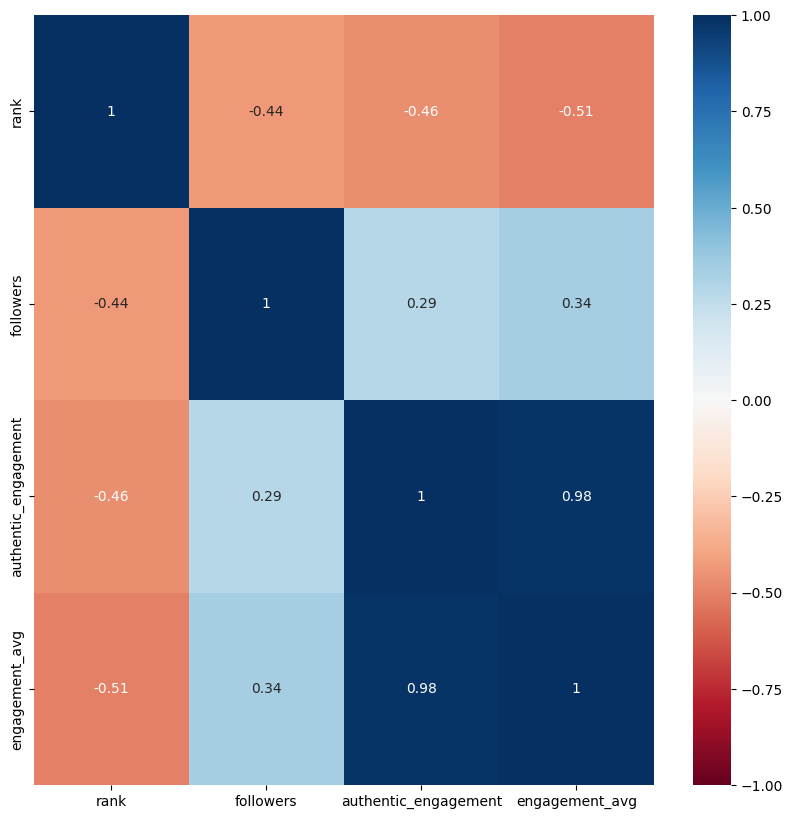

In [9]:
# Vamos a realizar el mapa de calor para ver mejor las correlaciones
plt.figure(figsize = (10,10))


sns.heatmap(matriz_correlacion,
            cmap = "RdBu", 
            annot = True, 
            vmin = -1, 
            vmax = 1 
);

3) Sesgos de alguna de las variables numéricas del dataset.

- Seguidores

In [10]:
sesgo = skew(df['followers'])
print(f"El valor del sesgo para la variable followers es: {sesgo}")

El valor del sesgo para la variable followers es: 5.841688024139401


<Figure size 1000x500 with 0 Axes>

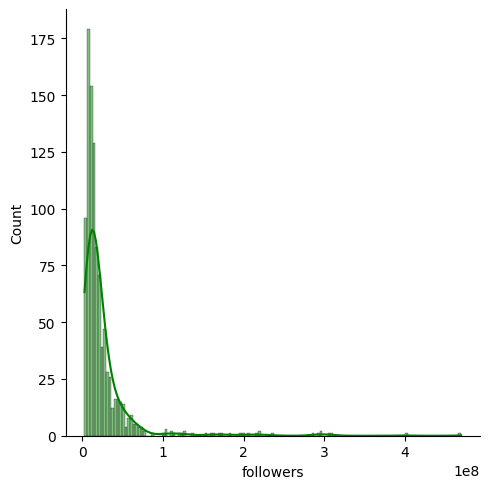

In [23]:
plt.figure(figsize=(10,5))

sns.displot(df["followers"],kde = True, color='green');

- Reacciones/Interacciones

In [24]:
sesgo = skew(df['authentic_engagement'])
print(f"El valor del sesgo para la variable authentic_engagement es: {sesgo}")

El valor del sesgo para la variable authentic_engagement es: 6.261574785511843


<Figure size 1000x500 with 0 Axes>

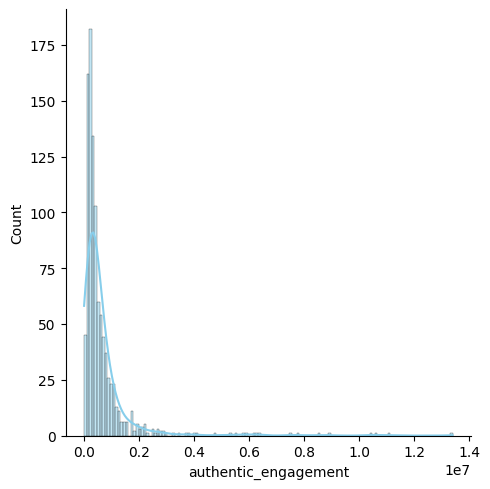

In [26]:
plt.figure(figsize=(10,5))
sns.displot(df["authentic_engagement"], color = "skyblue", kde = True);

4) Intervalo de confianza de algunas de las variables numéricas del dataset

- Seguidores

In [27]:
datos_seguidores = df['followers']

print(st.t.interval(alpha=0.95, df=len(datos_seguidores)-1, loc=np.mean(datos_seguidores), scale=st.sem(datos_seguidores)))


print(np.mean(datos_seguidores))

(22433253.549261674, 27238946.450738326)
24836100.0


/var/folders/db/hp0l5_js4yv8br5y2tc3frpm0000gn/T/ipykernel_56284/766309902.py:3: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  print(st.t.interval(alpha=0.95, df=len(datos_seguidores)-1, loc=np.mean(datos_seguidores), scale=st.sem(datos_seguidores)))


- Reacciones/Interacciones

In [29]:
datos_reacciones = df['authentic_engagement']

print(st.t.interval(alpha=0.95, df=len(datos_reacciones)-1, loc=np.mean(datos_reacciones), scale=st.sem(datos_reacciones)))


print(np.mean(datos_reacciones))

(580936.8938247674, 717308.7061752327)
649122.8


/var/folders/db/hp0l5_js4yv8br5y2tc3frpm0000gn/T/ipykernel_43648/1290690017.py:3: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  print(st.t.interval(alpha=0.95, df=len(datos_reacciones)-1, loc=np.mean(datos_reacciones), scale=st.sem(datos_reacciones)))


5) Interpretación de los resultados.
Ahora interpreta los resultados obtenidos de los diferentes estadísticos estudiados haciendo hincapié en aspectos interesantes de tus datos y explica lo mejor posible la naturaleza de los mismos.

`Hemos segmentado la columna 'followers' categorizando por cantidad de seguidores en 'bajo', 'medio' y 'alto.
Al realizar la tabla de contingencia de dicha categorizacion con la columna 'category'(categoria de temas de los que trata esa cuenta) podemos concluir que es muy probable que las categorias que presenten alguna cuenta con numero de seguidores alto tambien incluyan cuentas con numero de seguidores medio y bajo.`

`En cuanto a la correlacion de las variables numericas vemos que en la matriz y el mapa de calor las variables que hemos elegido tienen una correlacion baja positiva. Hemos elegido 'followers' y 'authentic_engagement' por que son las unicas que son independientes entre si ('authentic_engagement' y ''authentic_avg' estan altamente relacionadas por que una es el estadistico de la otra).`

`Al hacer los sesgos y la representacion de frecuencias vemos que posiblemente la relacion entre numero de seguidores y cantidad de reacciones por cuenta no esta muy relacionada en nuestros datos debido a la gran dispersion de datos que tenemos, se observan gran numero de outlayers hacia la derecha.`

`Deberiamos poder limpiar o ponderar de alguna manera estos outlayes para poder encontrar la correlacion real ( es mas facil que haya mas reacciones cuando una cuenta tiene mas seguidores ).`

